Convergence achieved after 130 epochs.


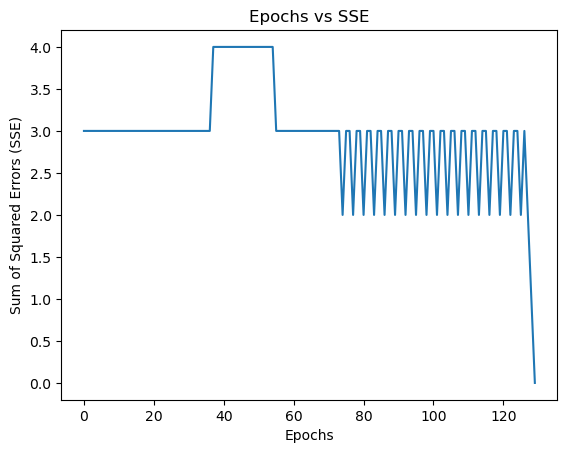

Final Weights: W0=-0.10000000000000765, W1=0.1000000000000001, W2=0.05000000000000032
Number of epochs: 130

Testing after training:
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 0
Input: (1, 0) -> Output: 0
Input: (1, 1) -> Output: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sum_unit(arr):
  sum = 0
  for i in range(arr):
    sum += arr[i]
  return sum


# Step function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Bipolar Step function
def bipolar_step_function(x):
    return np.where(x >= 0, 1, -1)

# Sigmoid function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# TanH function
def tanh_function(x):
    return np.tanh(x)

# ReLU function
def relu_function(x):
    return np.maximum(0, x)

# Leaky ReLU function
def leaky_relu_function(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)




def error_calculator(y_true, y_pred, error_type='mse'):
    if error_type == 'mse':
        return np.mean((y_true - y_pred) ** 2)

    elif error_type == 'mae':
        return np.mean(np.abs(y_true - y_pred))

    elif error_type == 'rmse':
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    else:
        raise ValueError(f"Unknown error type: {error_type}")


W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

def perceptron(X, y, W0, W1, W2, learning_rate=0.05, max_epochs=1000, target_error=0.002):
    errors = []  # To store the sum of squared errors (SSE) for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]

            # Calculate the weighted sum
            weighted_sum = W0 + W1 * x1 + W2 * x2

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Calculate the error
            error = y[i] - prediction
            # total_error += error ** 2
            total_error += error_calculator(y[i],prediction,'mse')

            # Update the weights based on the error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Store the sum of squared errors for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= target_error:
            print(f"Convergence achieved after {epoch + 1} epochs.")
            break

    # Plot the error vs epochs
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Epochs vs SSE')
    plt.show()

    return W0, W1, W2,  epoch + 1

# Example usage:
# Input dataset for AND logic gate
X = [(0, 0), (0, 1), (1, 0), (1, 1)]
y = [0, 0, 0, 1]  # Expected outputs for AND gate

# Initial weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Train the perceptron
W0, W1, W2, num_epochs = perceptron(X, y, W0, W1, W2, learning_rate)

# Output final weights and number of epochs needed for convergence
print(f"Final Weights: W0={W0}, W1={W1}, W2={W2}")
print(f"Number of epochs: {num_epochs}")

# Test the perceptron after training
print("\nTesting after training:")
for x1, x2 in X:
    weighted_sum = W0 + W1 * x1 + W2 * x2
    print(f"Input: ({x1}, {x2}) -> Output: {step_function(weighted_sum)}")


Running experiment with bipolar_step_function...
Convergence achieved after 130 epochs using bipolar_step_function.
Final Weights: W0=-0.10000000000000765, W1=0.1000000000000001, W2=0.05000000000000032
Number of epochs: 130

Running experiment with sigmoid_function...
Convergence achieved after 130 epochs using sigmoid_function.
Final Weights: W0=-0.10000000000000765, W1=0.1000000000000001, W2=0.05000000000000032
Number of epochs: 130

Running experiment with relu_function...
Convergence achieved after 75 epochs using relu_function.
Final Weights: W0=0.39999999999999675, W1=0.10000000000000077, W2=0.04999999999999816
Number of epochs: 75


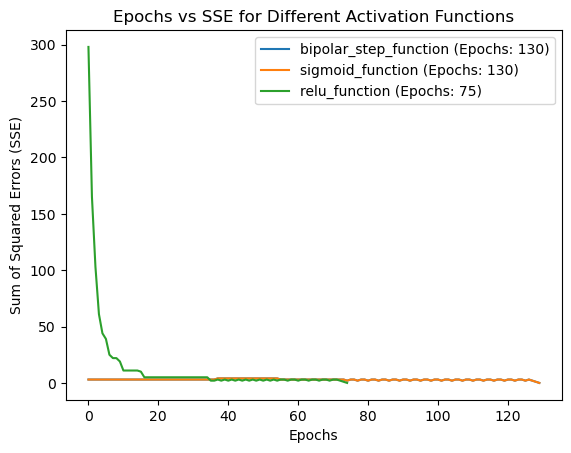

In [2]:

import matplotlib.pyplot as plt
import math

# Bi-Polar Step activation function
def bipolar_step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else -1

# Sigmoid activation function
def sigmoid_function(weighted_sum):
    return 1 / (1 + math.exp(-weighted_sum))

# ReLU activation function
def relu_function(weighted_sum):
    return max(0, weighted_sum)

# General perceptron function with different activation functions
def perceptron(X, y, W0, W1, W2, activation_func, learning_rate=0.05, max_epochs=1000, target_error=0.002):
    errors = []  # To store the sum of squared errors (SSE) for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]

            # Calculate the weighted sum
            weighted_sum = W0 + W1 * x1 + W2 * x2

            # Apply the chosen activation function
            prediction = activation_func(weighted_sum)

            # Convert bipolar output to binary for error calculation (only for bipolar step)
            if activation_func == bipolar_step_function:
                binary_prediction = 1 if prediction == 1 else 0
            else:
                binary_prediction = round(prediction)

            # Calculate the error
            error = y[i] - binary_prediction
            total_error += error ** 2

            # Update the weights based on the error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Store the sum of squared errors for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= target_error:
            print(f"Convergence achieved after {epoch + 1} epochs using {activation_func.__name__}.")
            break

    # Plot the error vs epochs
    plt.plot(errors, label=f'{activation_func.__name__} (Epochs: {epoch + 1})')

    return W0, W1, W2, epoch + 1

# Experiment with different activation functions
def run_experiment():
    # Input dataset for AND logic gate
    X = [(0, 0), (0, 1), (1, 0), (1, 1)]
    y = [0, 0, 0, 1]  # Expected outputs for AND gate

    # Initial weights and learning rate
    W0, W1, W2 = 10, 0.2, -0.75
    learning_rate = 0.05

    # Run experiments with different activation functions
    for activation_func in [bipolar_step_function, sigmoid_function, relu_function]:
        print(f"\nRunning experiment with {activation_func.__name__}...")

        # Reset weights
        W0, W1, W2 = 10, 0.2, -0.75

        # Train the perceptron
        W0, W1, W2, num_epochs = perceptron(X, y, W0, W1, W2, activation_func, learning_rate)

        # Output final weights and number of epochs needed for convergence
        print(f"Final Weights: W0={W0}, W1={W1}, W2={W2}")
        print(f"Number of epochs: {num_epochs}")

    # Finalize and show the plot
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Epochs vs SSE for Different Activation Functions')
    plt.legend()
    plt.show()

# Run the experiment
run_experiment()



Running experiment with learning rate = 0.1...
Number of epochs: 68

Running experiment with learning rate = 0.2...
Number of epochs: 37

Running experiment with learning rate = 0.3...
Number of epochs: 23

Running experiment with learning rate = 0.4...
Number of epochs: 23

Running experiment with learning rate = 0.5...
Number of epochs: 19

Running experiment with learning rate = 0.6...
Number of epochs: 19

Running experiment with learning rate = 0.7...
Number of epochs: 15

Running experiment with learning rate = 0.8...
Number of epochs: 14

Running experiment with learning rate = 0.9...
Number of epochs: 13

Running experiment with learning rate = 1...
Number of epochs: 12


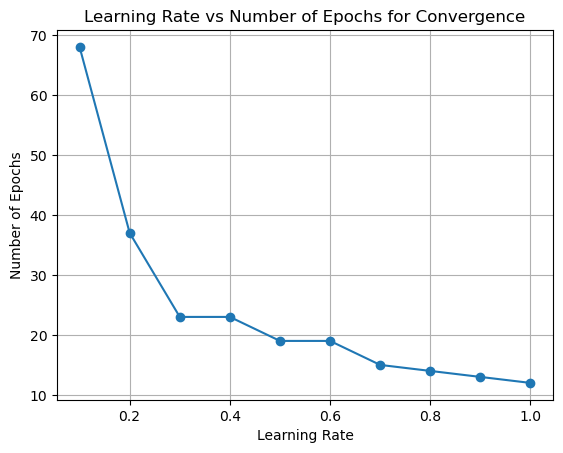

In [3]:
import matplotlib.pyplot as plt
import math

# Step activation function
def step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

# General perceptron function with different learning rates
def perceptron_with_learning_rate(X, y, W0, W1, W2, learning_rate, max_epochs=1000, target_error=0.002):
    errors = []  # To store the sum of squared errors (SSE) for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]

            # Calculate the weighted sum
            weighted_sum = W0 + W1 * x1 + W2 * x2

            # Apply the step activation function
            prediction = step_function(weighted_sum)

            # Calculate the error
            error = y[i] - prediction
            total_error += error ** 2

            # Update the weights based on the error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Store the sum of squared errors for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= target_error:
            return epoch + 1  # Return the number of epochs needed to converge

    # If not converged within max_epochs
    return max_epochs

# Experiment with different learning rates
def run_experiment_with_learning_rates():
    # Input dataset for AND logic gate
    X = [(0, 0), (0, 1), (1, 0), (1, 1)]
    y = [0, 0, 0, 1]  # Expected outputs for AND gate

    # Initial weights
    initial_W0, initial_W1, initial_W2 = 10, 0.2, -0.75
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    epochs_needed = []

    for lr in learning_rates:
        print(f"\nRunning experiment with learning rate = {lr}...")

        # Reset weights
        W0, W1, W2 = initial_W0, initial_W1, initial_W2

        # Train the perceptron
        num_epochs = perceptron_with_learning_rate(X, y, W0, W1, W2, lr)

        # Record the number of epochs needed for convergence
        epochs_needed.append(num_epochs)
        print(f"Number of epochs: {num_epochs}")

    # Plot the learning rate vs number of epochs
    plt.plot(learning_rates, epochs_needed, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Epochs')
    plt.title('Learning Rate vs Number of Epochs for Convergence')
    plt.grid(True)
    plt.show()

# Run the experiment
run_experiment_with_learning_rates()


Running experiment with step_function...
Number of epochs: 1000

Running experiment with bipolar_step_function...
Number of epochs: 1000

Running experiment with sigmoid_function...
Number of epochs: 1000

Running experiment with relu_function...
Number of epochs: 1000

Running experiment with learning rate = 0.1...
Number of epochs: 1000

Running experiment with learning rate = 0.2...
Number of epochs: 1000

Running experiment with learning rate = 0.3...
Number of epochs: 1000

Running experiment with learning rate = 0.4...
Number of epochs: 1000

Running experiment with learning rate = 0.5...
Number of epochs: 1000

Running experiment with learning rate = 0.6...
Number of epochs: 1000

Running experiment with learning rate = 0.7...
Number of epochs: 1000

Running experiment with learning rate = 0.8...
Number of epochs: 1000

Running experiment with learning rate = 0.9...
Number of epochs: 1000

Running experiment with learning rate = 1...
Number of epochs: 1000


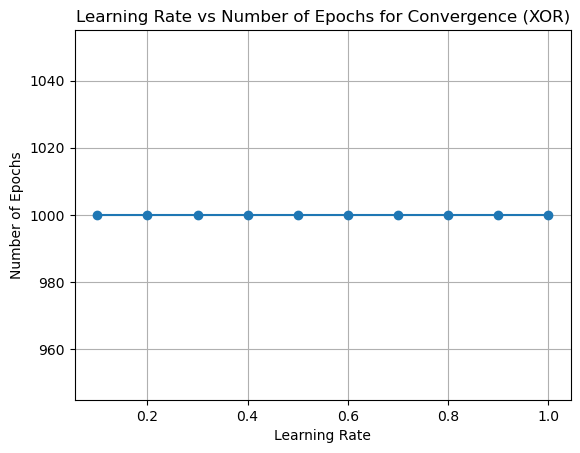

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define activation functions
def step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

def bipolar_step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else -1

def sigmoid_function(weighted_sum):
    return 1 / (1 + np.exp(-weighted_sum))

def relu_function(weighted_sum):
    return max(0, weighted_sum)

# Perceptron function with different activation functions
def perceptron(X, y, W0, W1, W2, activation_func, learning_rate=0.05, max_epochs=1000, target_error=0.002):
    errors = []  # To store the sum of squared errors (SSE) for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            x1, x2 = X[i]

            # Calculate the weighted sum
            weighted_sum = W0 + W1 * x1 + W2 * x2

            # Apply the chosen activation function
            prediction = activation_func(weighted_sum)

            # Convert output to binary for error calculation
            if activation_func == bipolar_step_function:
                binary_prediction = 1 if prediction == 1 else 0
            else:
                binary_prediction = round(prediction)

            # Calculate the error
            error = y[i] - binary_prediction
            total_error += error ** 2

            # Update the weights based on the error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2

        # Store the sum of squared errors for this epoch
        errors.append(total_error)

        # Check for convergence
        if total_error <= target_error:
            return epoch + 1  # Return the number of epochs needed to converge

    # If not converged within max_epochs
    return max_epochs

# Experiment with different activation functions for XOR
def run_experiment_with_activation_functions():
    # Input dataset for XOR logic gate
    X = [(0, 0), (0, 1), (1, 0), (1, 1)]
    y = [0, 1, 1, 0]  # Expected outputs for XOR gate

    # Initial weights and learning rate
    initial_W0, initial_W1, initial_W2 = 10, 0.2, -0.75
    learning_rate = 0.05

    activation_functions = [step_function, bipolar_step_function, sigmoid_function, relu_function]
    for activation_func in activation_functions:
        print(f"\nRunning experiment with {activation_func.__name__}...")

        # Reset weights
        W0, W1, W2 = initial_W0, initial_W1, initial_W2

        # Train the perceptron
        num_epochs = perceptron(X, y, W0, W1, W2, activation_func, learning_rate)

        # Record the number of epochs needed for convergence
        print(f"Number of epochs: {num_epochs}")

# Experiment with different learning rates for XOR
def run_experiment_with_learning_rates():
    # Input dataset for XOR logic gate
    X = [(0, 0), (0, 1), (1, 0), (1, 1)]
    y = [0, 1, 1, 0]  # Expected outputs for XOR gate

    # Initial weights
    initial_W0, initial_W1, initial_W2 = 10, 0.2, -0.75
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    epochs_needed = []

    for lr in learning_rates:
        print(f"\nRunning experiment with learning rate = {lr}...")

        # Reset weights
        W0, W1, W2 = initial_W0, initial_W1, initial_W2

        # Train the perceptron
        num_epochs = perceptron(X, y, W0, W1, W2, step_function, lr)

        # Record the number of epochs needed for convergence
        epochs_needed.append(num_epochs)
        print(f"Number of epochs: {num_epochs}")

    # Plot the learning rate vs number of epochs
    plt.plot(learning_rates, epochs_needed, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Epochs')
    plt.title('Learning Rate vs Number of Epochs for Convergence (XOR)')
    plt.grid(True)
    plt.show()

# Run the experiments
run_experiment_with_activation_functions()
run_experiment_with_learning_rates()


Convergence achieved after 9 epochs.
Final Weights: [ 0.1 -0.3  8.4 -3.2]


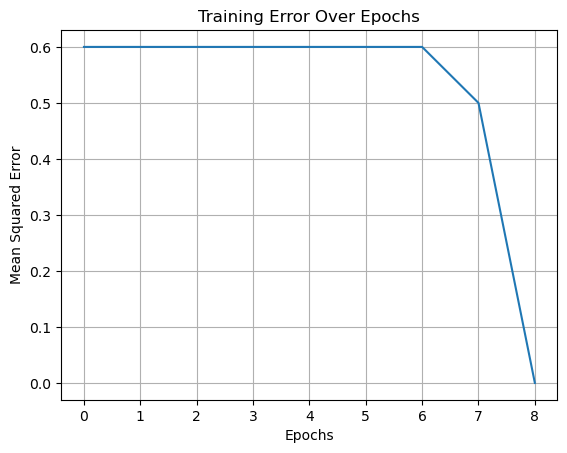

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the perceptron function
def perceptron(X, y, W, learning_rate=0.1, max_epochs=1000, target_error=0.01):
    X = np.array(X)
    y = np.array(y)
    W = np.array(W)

    num_samples = X.shape[0]
    num_features = X.shape[1]
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(num_samples):
            xi = np.insert(X[i], 0, 1)  # Add bias term
            weighted_sum = np.dot(xi, W)
            prediction = sigmoid(weighted_sum)
            prediction_binary = round(prediction)

            error = y[i] - prediction_binary
            total_error += error ** 2

            # Update weights
            W += learning_rate * error * xi

        # Append the average error for this epoch
        errors.append(total_error / num_samples)

        # Check for convergence
        if total_error / num_samples <= target_error:
            print(f"Convergence achieved after {epoch + 1} epochs.")
            break

    return W, errors

# Prepare the data
X = [
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
]

# Convert 'High Value' to 1 and 'Low Value' to 0
y = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]

# Initialize weights and learning rate
initial_weights = np.array([0.0, 0.0, 0.0, 0.0])  # Including bias weight
learning_rate = 0.1

# Train the perceptron
weights, error_history = perceptron(X, y, initial_weights, learning_rate)

print("Final Weights:", weights)

# Plot error history
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Epochs')
plt.grid(True)
plt.show()


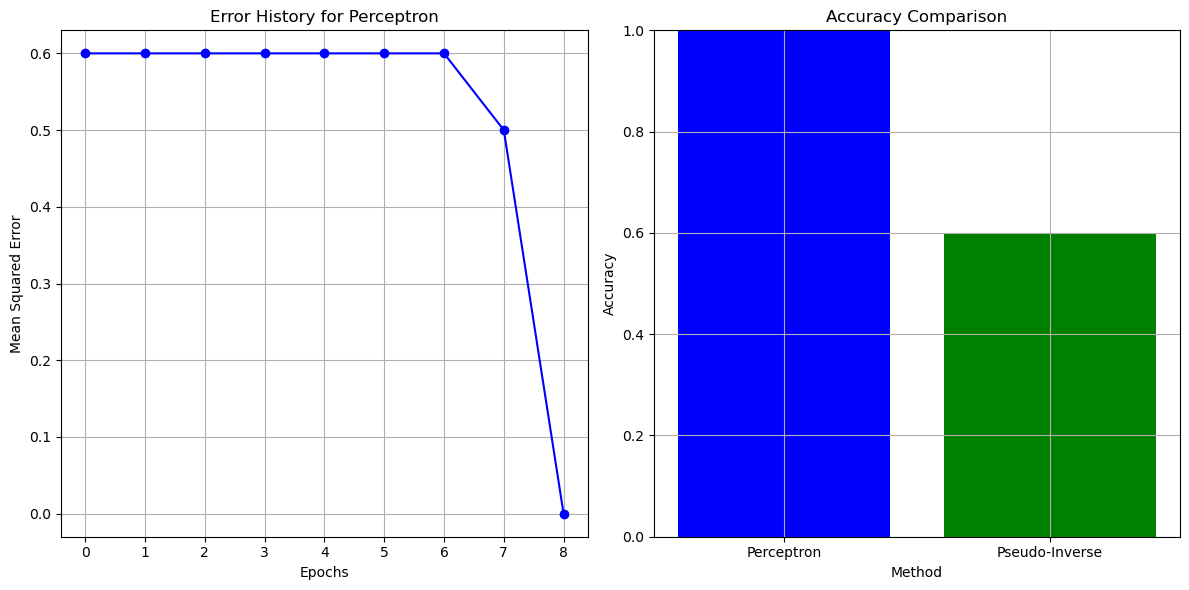

Accuracy using perceptron method: 100.00%
Accuracy using pseudo-inverse method: 60.00%


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define perceptron training function
def perceptron(X, y, W, learning_rate=0.1, max_epochs=1000, target_error=0.01):
    X = np.array(X)
    y = np.array(y)
    W = np.array(W)

    num_samples = X.shape[0]
    num_features = X.shape[1]
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(num_samples):
            xi = np.insert(X[i], 0, 1)  # Add bias term
            weighted_sum = np.dot(xi, W)
            prediction = sigmoid(weighted_sum)
            prediction_binary = round(prediction)

            error = y[i] - prediction_binary
            total_error += error ** 2

            # Update weights
            W += learning_rate * error * xi

        errors.append(total_error / num_samples)

        if total_error / num_samples <= target_error:
            break

    return W, errors

# Prepare the data
X = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])

# Add bias term
X_bias = np.insert(X, 0, 1, axis=1)

# Target values
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and learning rate
initial_weights = np.array([0.0, 0.0, 0.0, 0.0])  # Including bias weight
learning_rate = 0.1

# Train the perceptron
weights_perceptron, error_history = perceptron(X, y, initial_weights, learning_rate)

# Predictions using perceptron weights
def predict(X, weights):
    return np.round(sigmoid(np.dot(X, weights)))

# Predictions and accuracy using perceptron
predictions_perceptron = predict(X_bias, weights_perceptron)
accuracy_perceptron = np.mean(predictions_perceptron == y)

# Matrix pseudo-inverse method
def compute_weights_pseudo_inverse(X, y):
    X_pseudo_inv = np.linalg.pinv(X)
    weights = np.dot(X_pseudo_inv, y)
    return weights

# Compute weights and predictions using pseudo-inverse
weights_pseudo_inverse = compute_weights_pseudo_inverse(X_bias, y)
predictions_pseudo_inverse = predict(X_bias, weights_pseudo_inverse)
accuracy_pseudo_inverse = np.mean(predictions_pseudo_inverse == y)

# Plot results
plt.figure(figsize=(12, 6))

# Error history for perceptron
plt.subplot(1, 2, 1)
plt.plot(error_history, marker='o', color='b', label='Perceptron Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Error History for Perceptron')
plt.grid(True)

# Accuracy comparison
plt.subplot(1, 2, 2)
methods = ['Perceptron', 'Pseudo-Inverse']
accuracies = [accuracy_perceptron, accuracy_pseudo_inverse]
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Accuracy using perceptron method: {accuracy_perceptron * 100:.2f}%")
print(f"Accuracy using pseudo-inverse method: {accuracy_pseudo_inverse * 100:.2f}%")

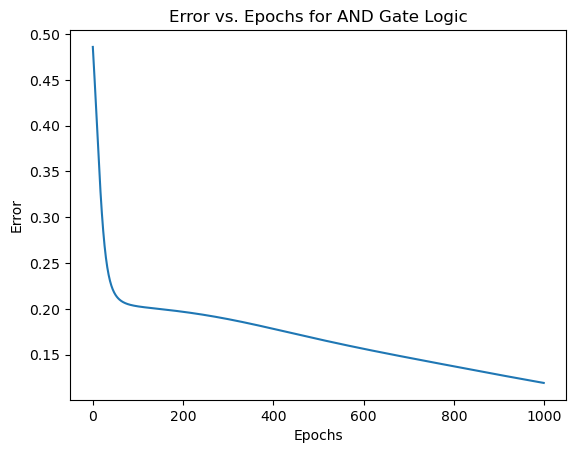

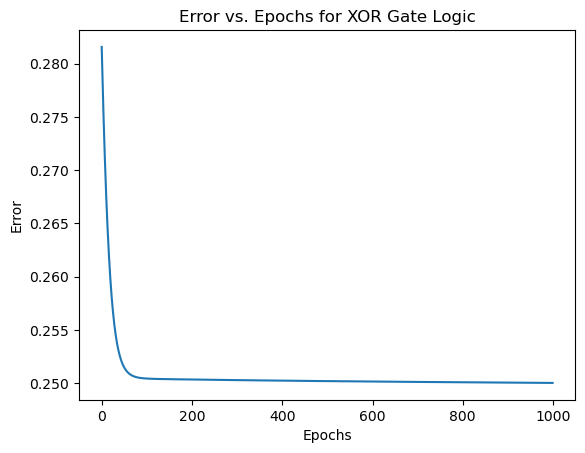

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Task A8: Develop a neural network with sigmoid activation function and back-propagation algorithm
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4)
        self.weights2   = np.random.rand(4,1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.errors     = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        self.weights1 += 0.05 * d_weights1
        self.weights2 += 0.05 * d_weights2

        # Calculate the error
        error = np.mean(np.square(self.y - self.output))
        self.errors.append(error)


if __name__ == "__main__":
    # AND gate logic dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [0], [0], [1]])

    # Create a neural network instance
    nn = NeuralNetwork(X, y)

    # Train the network
    for i in range(1000):
        nn.feedforward()
        nn.backprop()

    # Plot the error vs. epoch graph
    plt.plot(np.arange(1000), nn.errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error vs. Epochs for AND Gate Logic')
    plt.show()



# Task A9: Repeat the experiment for XOR gate logic
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

nn_xor = NeuralNetwork(X_xor, y_xor)

for i in range(1000):
    nn_xor.feedforward()
    nn_xor.backprop()

plt.plot(np.arange(1000), nn_xor.errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for XOR Gate Logic')
plt.show()


     


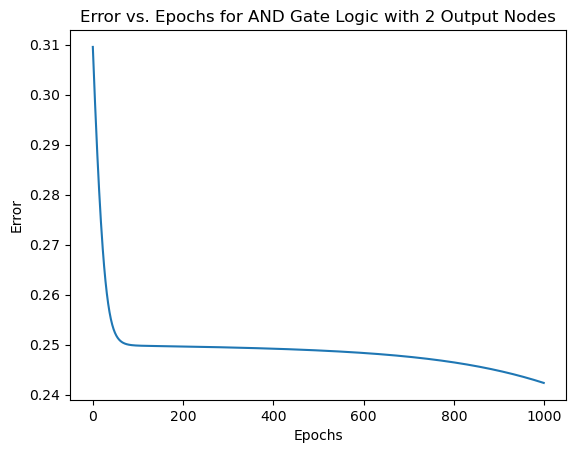

In [12]:
# Task A10: Repeat the experiment with 2 output nodes
X_and_2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_2 = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

class NeuralNetwork:
    def __init__(self, X, y):
        self.input      = X
        self.weights1   = np.random.rand(self.input.shape[1],4)
        self.weights2   = np.random.rand(4,2)
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        d_output = 2*(self.y - self.output) * sigmoid_derivative(self.output)
        d_weights2 = np.dot(self.layer1.T, d_output)

        d_layer1 = d_output.dot(self.weights2.T) * sigmoid_derivative(self.layer1)
        d_weights1 = np.dot(self.input.T, d_layer1)

        self.weights1 += 0.05 * d_weights1
        self.weights2 += 0.05 * d_weights2

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

nn_and_2 = NeuralNetwork(X_and_2, y_and_2)
errors = []
for i in range(1000):
    nn_and_2.feedforward()
    nn_and_2.backprop()
    error = np.mean((nn_and_2.y - nn_and_2.output) ** 2)
    errors.append(error)

plt.plot(np.arange(1000), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for AND Gate Logic with 2 Output Nodes')
plt.show()

In [13]:
from sklearn.neural_network import MLPClassifier

# AND Gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

mlp_and = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)
mlp_and.fit(X_and, y_and)

# XOR Gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

mlp_xor = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)
mlp_xor.fit(X_xor, y_xor)

C:\Users\91967\OneDrive\Documents\Downloads\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)

In [14]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the MLPClassifier
mlp_project = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)

# Train the model using the training sets
mlp_project.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp_project.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",mlp_project.score(X_test, y_test))

Accuracy: 1.0


C:\Users\91967\OneDrive\Documents\Downloads\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the MLPClassifier
mlp_project = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000)

# Train the model using the training sets
mlp_project.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp_project.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy = mlp_project.score(X_test, y_test)

# Plot the accuracy
plt.figure(figsize=(6, 6))
plt.bar(['Accuracy'], [accuracy])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('MLPClassifier Accuracy')
plt.show()